# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
import requests

analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ngond\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file C:\Users\ngond\anaconda3_1\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\ngond\anaconda3_1\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\ngond\anaconda3_1\envs\p

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
apikey = os.getenv("newsapi")


In [3]:
bitcoin_url='https://newsapi.org/v2/everything?q=bitcoin&apiKey='+apikey
ethereum_url='https://newsapi.org/v2/everything?q=ethereum&apiKey='+apikey


In [4]:
# btc_reponse_data=requests.get(bitcoin_url).json()
# eth_reponse_data=requests.get(ethereum_url).json()

In [5]:

def get_articles_df(json_obj):
    
    sentiments = []

    for article in json_obj["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
                
            })
            
        except AttributeError:
            pass

    df = pd.DataFrame(sentiments)

    cols = [ "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df







    

In [6]:
# # Create a newsapi client
# # YOUR CODE HERE!
# newsapi = NewsApiClient(api_key=apikey)
newsapi = NewsApiClient(api_key=apikey)


In [7]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_reponse_data = newsapi.get_everything(q='bitcoin',language='en')
get_articles_df(btc_reponse_data)['text']

0     A similar hoax earlier this year tied Walmart ...
1     Theres a big new presence slurping up power fr...
2     For all the talk of democratizing finance, the...
3     In keeping with a previous announcement, AMC t...
4     Representation of cryptocurrency Bitcoin is pl...
5     A representation of the virtual cryptocurrency...
6     A representation of the virtual cryptocurrency...
7     Posted \r\nBitcoin climbed to a record high on...
8     A representation of the virtual cryptocurrency...
9     By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...
10    STR/NurPhoto via Getty Images\r\nThe first-eve...
11    Bitcoin artwork displayed at the Bitcoin 2021 ...
12    * Cryotocurrency gets boost from ETF bitcoin f...
13    Ether.\r\nNurPhoto\r\n<ul><li>The approval of ...
14    Bitcoin seen on display.\r\nRafael Henrique/SO...
15    Bitcoin was trading over 7% higher on Monday m...
16    Australian Baseball League club Perth Heat wil...
17    A passenger (R) talks to an airline employ

In [8]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_reponse_data = newsapi.get_everything(q='ethereum',language='en')
get_articles_df(eth_reponse_data)['text']

0     If you claim ownership, someone will probably ...
1     In keeping with a previous announcement, AMC t...
2     Ethereum and bitcoin are the two biggest crypt...
3     Elon Musk\r\npicture alliance / Getty Images\r...
4     Cryptocurrency and business continuity line im...
5     Apple CEO Tim Cook said he owns cryptocurrency...
6     With crypto rewards cards, a small percentage ...
7     Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...
8     Representations of cryptocurrencies Bitcoin, E...
9     Grill burger chain Burger King announced a par...
10    Rahul Rai, co-head of Market Neutral at BlockT...
11    Hours ago, a website appeared online with the ...
12    Ether, the second-largest cryptocurrency, soar...
13    The worlds second most valuable cryptocurrency...
14    NEW YORK, Nov 8 (Reuters) - Inflows into bitco...
15    An American Airlines Airbus A321-200 plane tak...
16    The process started Thursday at 6:13 p.m. New ...
17    The digital currency space is contracting 

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

btc_sent_score_df= get_articles_df(btc_reponse_data)

In [10]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sent_score_df = get_articles_df(eth_reponse_data)

In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sent_score_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.166550,0.045700,0.005300,0.949000
std,0.288800,0.067315,0.016633,0.065559
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.896500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.463275,0.103500,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sent_score_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.0,20.000000
mean,0.344085,0.079900,0.0,0.920100
std,0.312711,0.079076,0.0,0.079076
min,0.000000,0.000000,0.0,0.779000
25%,0.000000,0.000000,0.0,0.873250
50%,0.430350,0.084500,0.0,0.915500
75%,0.549700,0.126750,0.0,1.000000
max,0.822500,0.221000,0.0,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: *bitcoin has the highest mean positive score*

Q: Which coin had the highest compound score?

A: *Ethereum has the hightest compound score*

Q. Which coin had the highest positive score?

A: *ethereum has the highest positive score*

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\ngond\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ngond\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer=CountVectorizer(stop_words='english')

def get_text_from_df (dataFrame_obj):
    
    text = [word.lower() for word in dataFrame_obj.text.to_list()]
    text = ('').join(text)
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    text=regex.sub('',text)

    return text

def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

#[get_text_from_df(btc_sent_score_df)]
def get_word_count(text):
    X= vectorizer.fit_transform([text] )
    # Retrieve unique words list
    words = vectorizer.get_feature_names()



    words_df = pd.DataFrame(
        list(zip(words, np.ravel(X.sum(axis=0)))), columns=["Word", "Word_Count"]
    )
    print(words_df.sort_values('Word_Count',ascending=False).head(10))







In [15]:

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords
# YOUR CODE HERE!
sw=list((set(stopwords.words('english'))))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
btc_text = get_text_from_df(btc_sent_score_df)
eth_text = get_text_from_df(eth_sent_score_df)

#Find irrelevant top words
get_word_count(btc_text)
get_word_count(eth_text)

#add reuters to the list of stopwords
sw= list(set(sw).union({'seen'}))


               Word  Word_Count
26          bitcoin          22
207         reuters           7
232           taken           6
124    illustration           6
166             new           5
71   cryptocurrency           5
184         picture           5
202          record           4
216            seen           4
169             oct           4
               Word  Word_Count
102        ethereum           8
32          bitcoin           7
87   cryptocurrency           6
300            york           4
159          market           4
101           ether           3
243            said           3
66         charsthe           3
96          digital           3
121           getty           3


In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    result = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    result = [word.lower() for word in result]
    
    # Remove the stop words
    sw= list((set(stopwords.words('english')).union({'reuters'})))

    tokens = [word.lower() for word in result if word.lower() not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sent_score_df['tokens'] = btc_sent_score_df.apply(lambda row : tokenizer(row['text']),axis=1)

In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sent_score_df['tokens']= eth_sent_score_df.apply(lambda row : tokenizer(row['text']),axis=1)

In [19]:
btc_sent_score_df

,text,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
2,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."
5,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."
6,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."
7,Posted \r\nBitcoin climbed to a record high on...,0.4588,0.103,0.000,0.897,"[posted, bitcoin, climbed, record, high, wedne..."
8,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."
9,By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...,0.0000,0.000,0.000,1.000,"[staffsingapore, bitcoin, hit, sixmonth, high,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!


def generate_ngrams(DF) :
    processed =process_text(('').join([word.lower() for word in DF.text.to_list()]))
    bigram_counts = Counter(ngrams(processed, n=2))
    #print(sorted([(k,v) for k,v in enumerate(bigram_counts) if k >2]))
    print(dict(bigram_counts.most_common(20)))

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

generate_ngrams(btc_sent_score_df)

{('reuters', 'bitcoin'): 6, ('illustration', 'taken'): 5, ('cryptocurrency', 'bitcoin'): 4, ('oct', 'reuters'): 4, ('picture', 'illustration'): 4, ('representation', 'virtual'): 3, ('virtual', 'cryptocurrency'): 3, ('bitcoin', 'seen'): 3, ('seen', 'picture'): 3, ('taken', 'october'): 3, ('october', 'reutersedgar'): 3, ('wa', 'trading'): 3, ('kong', 'oct'): 2, ('bitcoin', 'fell'): 2, ('charsa', 'representation'): 2, ('bitcoin', 'futuresbased'): 2, ('exchangetraded', 'fund'): 2, ('bitcoin', 'hit'): 2, ('hit', 'sixmonth'): 2, ('sixmonth', 'high'): 2}


In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
generate_ngrams(eth_sent_score_df)

{('new', 'york'): 2, ('york', 'time'): 2, ('bitcoin', 'ethereum'): 2, ('ethereum', 'dogecoin'): 2, ('illustration', 'taken'): 2, ('taken', 'june'): 2, ('york', 'nov'): 2, ('los', 'angeles'): 2, ('claim', 'ownership'): 1, ('ownership', 'someone'): 1, ('someone', 'probably'): 1, ('probably', 'want'): 1, ('want', 'take'): 1, ('take', 'itin'): 1, ('itin', 'may'): 1, ('may', 'one'): 1, ('one', 'better'): 1, ('better', 'piece'): 1, ('piece', 'performance'): 1, ('performance', 'art'): 1}


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

import itertools


token_count(list(itertools.chain(*btc_sent_score_df.tokens)),10)


[('bitcoin', 25),
 ('char', 19),
 ('illustration', 6),
 ('taken', 6),
 ('new', 5),
 ('cryptocurrency', 5),
 ('picture', 5),
 ('wa', 5),
 ('us', 4),
 ('representation', 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(list(itertools.chain(*eth_sent_score_df.tokens)),10)

[('char', 20),
 ('ethereum', 9),
 ('bitcoin', 8),
 ('cryptocurrency', 7),
 ('ha', 4),
 ('york', 4),
 ('market', 4),
 ('ether', 4),
 ('cryptocurrencies', 3),
 ('getty', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

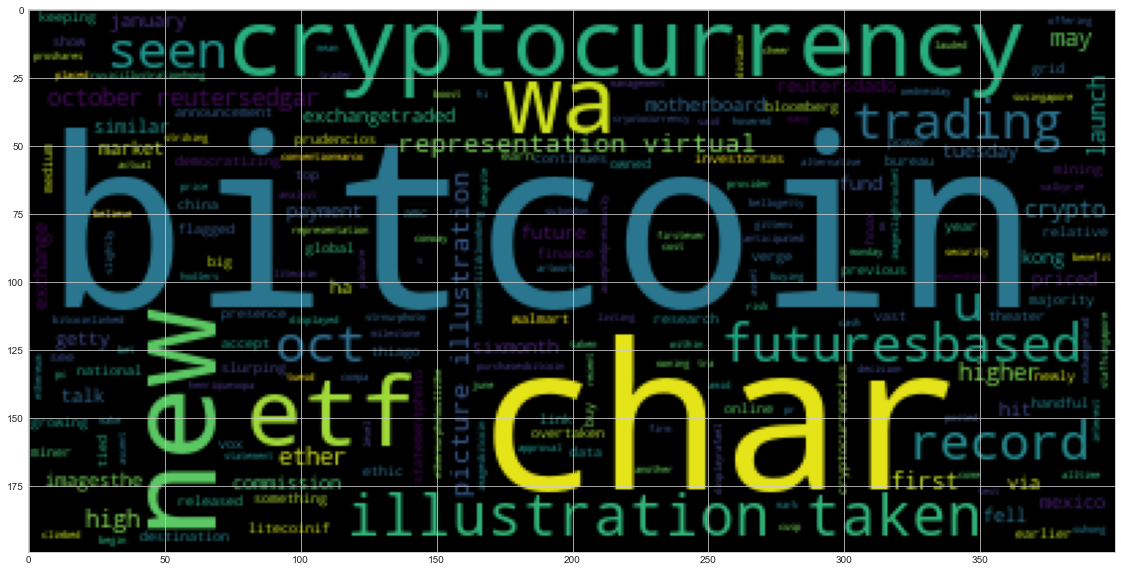

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
# def get_wordcloud(df):
#     big_string = ' '.join(list(itertools.chain(*df.tokens)))
#     input_text = process_text(big_string)
#     wc = WordCloud().generate(big_string)
#    # print(big_string)
#     plt.imshow(wc)
# get_wordcloud(btc_sent_score_df)

input_text =process_text((' ').join(list(itertools.chain(*btc_sent_score_df.tokens))))
input_text =(' ').join(input_text)
wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.show()
#wc.to_file('btc.png')

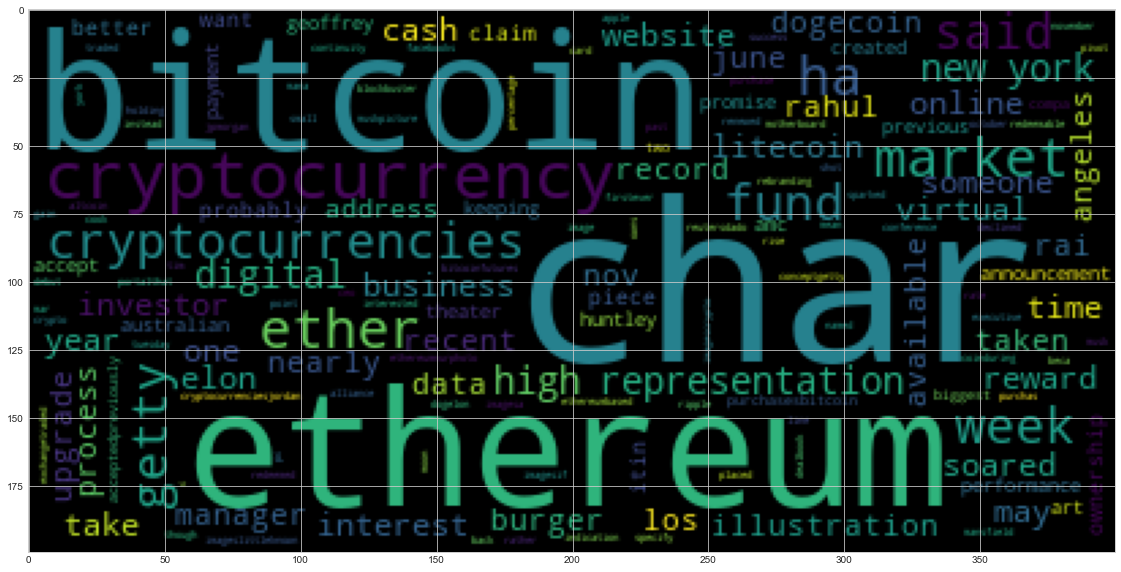

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
input_text =process_text((' ').join(list(itertools.chain(*eth_sent_score_df.tokens))))
input_text =(' ').join(input_text)
wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [34]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
#nlp = spacy.load("en_core_web_sm")

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text =(' ').join(btc_sent_score_df.text.to_list())
btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dad

In [58]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title']='Bitcoin string text'


In [57]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [59]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['earlier this year', 'Verge', 'Vox Media', 'Photo Illustration', 'Thiago Prudencio/S', 'U.S.', 'U.S.', 'China', 'Bloomberg', 'the National Bureau', 'AMC', 'Bitcoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/', 'IllustrationHONG KONG', 'Oct 21', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Edgar SuHONG KONG', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Bitcoin', 'October 18, 2021', 'REUTERS', 'Oct 19', 'Reuters', 'six-month', '+2332', 'Reuters', 'SINGAPORE', 'Reuters', 'six-month', 'Tuesday', 'U.S.', 'STR', 'NurPhoto', 'Getty Images', 'first', 'Tuesday', 'ProShares', 'Bitcoin 2021', 'Marco Bello/', 'The Securities and Exchange Commission', 'Valkyrie', 'ETF', 'ETF', 'NurPhoto', 'ETF', 'first', 'ETF', 'Rafael Henrique/SOPA Images/LightRocket', 'Getty Images', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', 'Australian Baseball League', 'Perth Heat', 'first', 'Hea', 'Mexican', 'Volaris',

---

### Ethereum NER

In [60]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text =(' ').join(eth_sent_score_df.text.to_list())
eth_text

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana 

In [61]:
# Run the NER processor on all of the text
doc = nlp(eth_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title']='Ethereum string text'

In [62]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [63]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents])

['this year', 'Australian Geoffrey Huntley', 'AMC', 'two', 'Jordan Mansfield', 'JPMorgan', 'beca', 'Elon Musk', 'Getty Images', 'Elon Musk', '3,780%', 'October', 'Dogelon Mars', '0.00000229', 'November 1', '0.0', 'Getty Images', 'the past week', 'Facebook', 'Apple', 'Tim Cook', "The New York Times'", 'Tuesday', '1-2%', 'Ethereum', 'NurPhoto', 'Getty Images', 'first', 'Bitcoin, Ethereum', 'DogeCoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo MU', 'Burger King', 'Robinhood', 'Royal Perks', '5', 'Rahul Rai', 'Market Neutral', 'BlockTower Capital', 'Rahul Rai', 'Crypto', 'Rahul Rai', '20', 'NFT', '] Ether', 'second', 'a record above $', '4,400', 'Friday', 'Ethereum', 'Bitcoin’s', 'second', 'NEW YORK', 'Reuters', 'a record $6.4 billion', 'this year', 'CoinShares', 'American Airlines', 'Airbus', 'A321-200', 'Los Angeles International', 'Los Angeles', 'California', 'U.S.', 'March 28, 2018', 'REUTERS', 'Mike Blake/File PhotoNEW YORK', 'Reute', 'Thursday', '6:13 p.m.', 'Ne

---